# Diabetes Challenge using KNN

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
X_path = r'TrainingData/Diabetes_XTrain.csv'
y_path = r'TrainingData/Diabetes_YTrain.csv'

In [45]:
X_train = pd.read_csv(X_path)
y_train = pd.read_csv(y_path)

In [46]:
print(f"Number of Samples of Training Data = {X_train.shape[0]}")
print(f"Number of Features of Training Data = {X_train.shape[1]}")
print(f"Number of Outcomes of Training Data = {y_train.shape}")
print(f"Training Data Size = {X_train.shape}")

Number of Samples of Training Data = 576
Number of Features of Training Data = 8
Number of Outcomes of Training Data = (576, 1)
Training Data Size = (576, 8)


In [47]:
type(y_train)

pandas.core.frame.DataFrame

## Plotting

In [48]:
categories, category_counts = np.unique(y_train, return_counts = True)

In [49]:
categories

array([0, 1])

In [50]:
category_counts

array([375, 201])

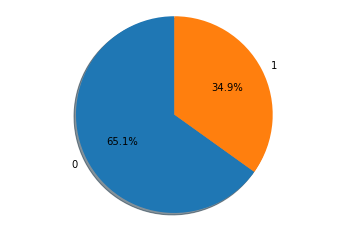

In [51]:
fig1, ax1 = plt.subplots()
ax1.pie(category_counts, labels=categories, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

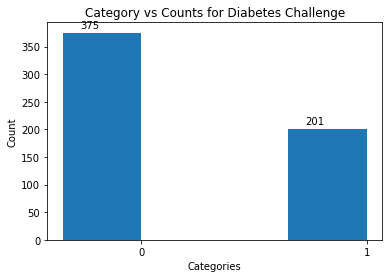

In [52]:
fig, ax = plt.subplots()
ax.set_ylabel('Count')
ax.set_xlabel('Categories')
ax.set_title('Category vs Counts for Diabetes Challenge')
ax.set_xticks(np.arange(len(categories)))
ax.set_xticklabels(categories)

label_locations = np.arange(len(categories)) # the label locations
width = 0.35 # the width of the bars

pps = ax.bar(label_locations - width/2, category_counts, width, label = 'Categories')

for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 3, height),
      xytext=(1, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

## Plotting Features vs Outcome for finding the best features

In [53]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [54]:
pregnancies = X_train['Pregnancies']
glucose = X_train['Glucose']
blood_pressure = X_train['BloodPressure']
skin_thickness = X_train['SkinThickness']
insulin = X_train['Insulin']
bmi = X_train['BMI']
diabetes_pedigree_function = X_train['DiabetesPedigreeFunction']
age = X_train['Age']

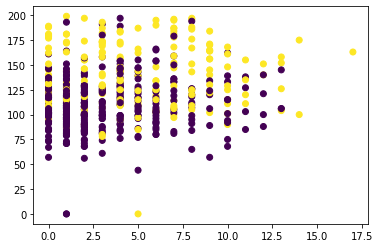

In [55]:
plt.scatter(pregnancies, glucose, c = np.array(y_train['Outcome']))
plt.show()

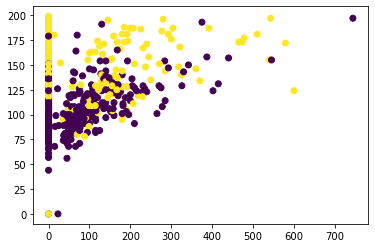

In [14]:
plt.scatter(insulin, glucose, c = np.array(y_train['Outcome']))
plt.show()

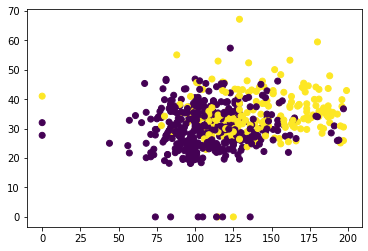

In [15]:
plt.scatter(glucose, bmi, c = np.array(y_train['Outcome']))
plt.show()

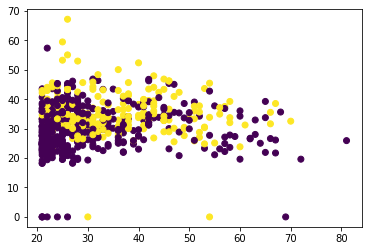

In [16]:
plt.scatter(age, bmi, c = np.array(y_train['Outcome']))
plt.show()

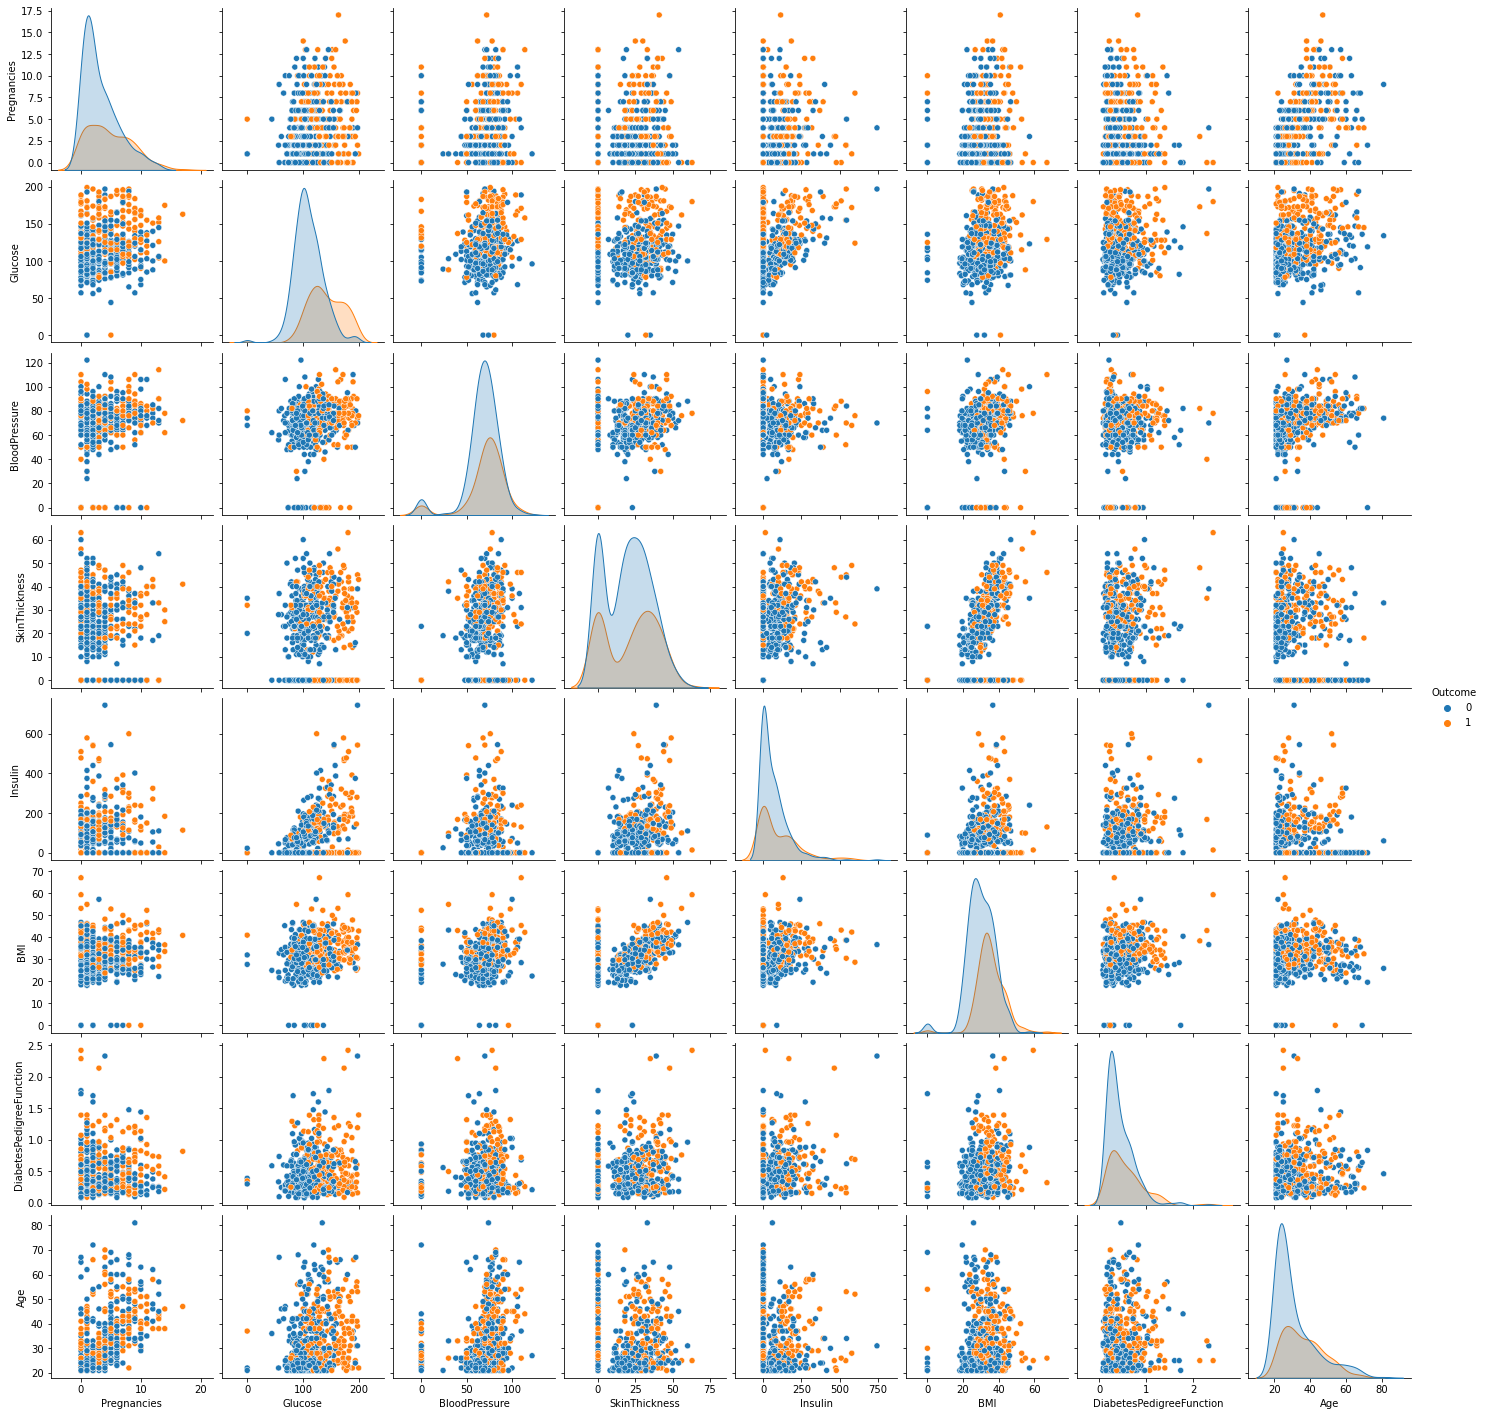

In [17]:
import seaborn as sns

X_y = pd.concat([X_train, y_train], axis = 1)
sns.pairplot(X_y, hue="Outcome")

## Finding the Best K

In [111]:
def calculate_distance(X, x_test, dist = "euclidean"):
    if dist == "euclidean":
        return np.sqrt(np.sum((X - x_test)**2, axis = 1))
    if dist == "manhattan":
        return np.sum(np.abs(X - x_test), axis = 1)
    if dist == "cosine":
        #dot product: for every row in v, multiply u and sum the elements
        u_dot_v = np.sum(X*x_test,axis = 1)

        #find the norm of u and each row of v
        mod_u = np.sqrt(np.sum(x_test*x_test))
        mod_v = np.sqrt(np.sum(X*X,axis = 1))

        #just apply the definition
        final = 1 - u_dot_v/(mod_u*mod_v)
        return final

In [57]:
def predict_using_KNN(X, y, x_test, k = 1, dist = "euclidean"):
    distances = calculate_distance(X, x_test, dist)
    distances_indices = np.argsort(distances)[:k]
    top_k_y = y[distances_indices]
    categories, counts = np.unique(top_k_y, return_counts = True)
    return categories[np.argmax(counts)]

In [58]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

In [59]:
total_training_indices = np.arange(X_train_np.shape[0])
train_indices = np.random.choice(total_training_indices, size = int(X_train_np.shape[0]* 0.8), replace=False)
test_indices = np.array([i for i in total_training_indices if i not in train_indices])

In [60]:
print(train_indices.shape)
print(test_indices.shape)
print(total_training_indices.shape)

(460,)
(116,)
(576,)


In [61]:
X_train_np_80 = X_train_np[train_indices]
y_train_np_80 = y_train_np[train_indices]
X_test_np_20 = X_train_np[test_indices]
y_test_np_20 = y_train_np[test_indices]

print(len(X_train_np_80))
print(len(y_train_np_80))
print(len(X_test_np_20))
print(len(y_test_np_20))

460
460
116
116


In [62]:
len(X_train_np) == X_train_np.shape[0]

True

In [63]:
def calculate_accuracy(ypred, ytrue):
    return (ypred==ytrue).mean()

k = 1, Test = 0.7068965517241379, Train = 1.0
k = 5, Test = 0.6982758620689655, Train = 0.7978260869565217
k = 9, Test = 0.7586206896551724, Train = 0.7891304347826087
k = 13, Test = 0.75, Train = 0.7717391304347826
k = 17, Test = 0.75, Train = 0.75
k = 21, Test = 0.7672413793103449, Train = 0.7565217391304347
k = 25, Test = 0.7672413793103449, Train = 0.75
k = 29, Test = 0.7586206896551724, Train = 0.7478260869565218
k = 33, Test = 0.7413793103448276, Train = 0.7391304347826086
k = 37, Test = 0.7327586206896551, Train = 0.7391304347826086
k = 41, Test = 0.7413793103448276, Train = 0.7369565217391304
k = 45, Test = 0.7413793103448276, Train = 0.7347826086956522
k = 49, Test = 0.7413793103448276, Train = 0.7260869565217392
k = 53, Test = 0.7327586206896551, Train = 0.7217391304347827
k = 57, Test = 0.7241379310344828, Train = 0.717391304347826
k = 61, Test = 0.7241379310344828, Train = 0.7195652173913043
k = 65, Test = 0.7155172413793104, Train = 0.7239130434782609
k = 69, Test = 0.7327

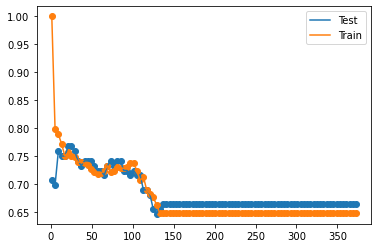

In [25]:
# Check for a large number of K values for the best K value.

k_values = np.arange(1, max(category_counts), 4)
train_accuracies = []
test_accuracies = []

for k in k_values:
    
    # Training
    ypreds_train = []
    for row in X_train_np_80:
        current_prediction = predict_using_KNN(X_train_np_80, y_train_np_80, row, k)
        ypreds_train.append(current_prediction)
    ypreds_train = np.array(ypreds_train).reshape(-1, 1)
    
    # Testing
    ypreds_test = []
    for row in X_test_np_20:
        current_prediction = predict_using_KNN(X_train_np_80, y_train_np_80, row, k)
        ypreds_test.append(current_prediction)
    ypreds_test = np.array(ypreds_test).reshape(-1, 1)
    
    # Accuracies
    train_accuracy = calculate_accuracy(ypreds_train, y_train_np_80)
    test_accuracy = calculate_accuracy(ypreds_test, y_test_np_20)
    
    print(f"k = {k}, Test = {test_accuracy}, Train = {train_accuracy}")
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
# Plotting Train and Test Accuracies for the values of K.

plt.scatter(k_values, test_accuracies)
plt.plot(k_values, test_accuracies, label = "Test")
plt.scatter(k_values, train_accuracies)
plt.plot(k_values, train_accuracies, label = "Train")

plt.legend()
plt.show()

Distance Metrics Used = euclidean
k = 1, Test = 0.7068965517241379, Train = 1.0
k = 5, Test = 0.7413793103448276, Train = 0.8
k = 9, Test = 0.7758620689655172, Train = 0.7739130434782608
k = 13, Test = 0.7672413793103449, Train = 0.7652173913043478
k = 17, Test = 0.7844827586206896, Train = 0.758695652173913
k = 21, Test = 0.7327586206896551, Train = 0.7543478260869565
k = 25, Test = 0.7241379310344828, Train = 0.7521739130434782
k = 29, Test = 0.6896551724137931, Train = 0.7543478260869565
k = 33, Test = 0.6896551724137931, Train = 0.7434782608695653
k = 37, Test = 0.6896551724137931, Train = 0.7521739130434782
k = 41, Test = 0.7155172413793104, Train = 0.7434782608695653
k = 45, Test = 0.7241379310344828, Train = 0.7391304347826086
k = 49, Test = 0.7155172413793104, Train = 0.741304347826087
k = 53, Test = 0.7155172413793104, Train = 0.7478260869565218
k = 57, Test = 0.7327586206896551, Train = 0.741304347826087
k = 61, Test = 0.7327586206896551, Train = 0.7347826086956522
k = 65, Te

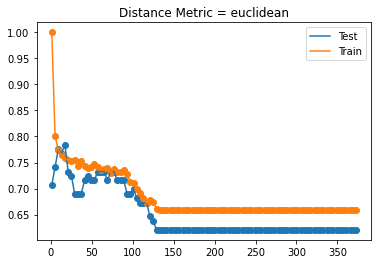

Distance Metrics Used = manhattan
k = 1, Test = 0.7586206896551724, Train = 1.0
k = 5, Test = 0.7758620689655172, Train = 0.7978260869565217
k = 9, Test = 0.75, Train = 0.7869565217391304
k = 13, Test = 0.75, Train = 0.782608695652174
k = 17, Test = 0.7413793103448276, Train = 0.7630434782608696
k = 21, Test = 0.7413793103448276, Train = 0.7565217391304347
k = 25, Test = 0.75, Train = 0.7478260869565218
k = 29, Test = 0.7155172413793104, Train = 0.7478260869565218
k = 33, Test = 0.7068965517241379, Train = 0.7543478260869565
k = 37, Test = 0.7241379310344828, Train = 0.7630434782608696
k = 41, Test = 0.7155172413793104, Train = 0.7543478260869565
k = 45, Test = 0.7241379310344828, Train = 0.7521739130434782
k = 49, Test = 0.7413793103448276, Train = 0.7478260869565218
k = 53, Test = 0.7327586206896551, Train = 0.7434782608695653
k = 57, Test = 0.7327586206896551, Train = 0.7478260869565218
k = 61, Test = 0.7241379310344828, Train = 0.7478260869565218
k = 65, Test = 0.7155172413793104, 

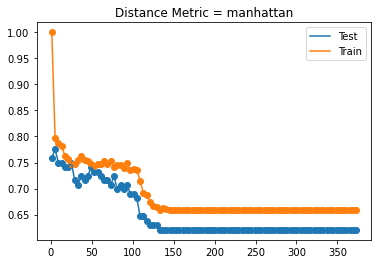

Distance Metrics Used = cosine
k = 1, Test = 0.603448275862069, Train = 1.0
k = 5, Test = 0.6982758620689655, Train = 0.7652173913043478
k = 9, Test = 0.6810344827586207, Train = 0.7347826086956522
k = 13, Test = 0.6551724137931034, Train = 0.7260869565217392
k = 17, Test = 0.6206896551724138, Train = 0.6956521739130435
k = 21, Test = 0.6637931034482759, Train = 0.6978260869565217
k = 25, Test = 0.6896551724137931, Train = 0.6934782608695652
k = 29, Test = 0.7068965517241379, Train = 0.7021739130434783
k = 33, Test = 0.7068965517241379, Train = 0.6782608695652174
k = 37, Test = 0.6982758620689655, Train = 0.6891304347826087
k = 41, Test = 0.7068965517241379, Train = 0.691304347826087
k = 45, Test = 0.6810344827586207, Train = 0.6804347826086956
k = 49, Test = 0.7068965517241379, Train = 0.6673913043478261
k = 53, Test = 0.6810344827586207, Train = 0.658695652173913
k = 57, Test = 0.6896551724137931, Train = 0.6565217391304348
k = 61, Test = 0.6724137931034483, Train = 0.663043478260869

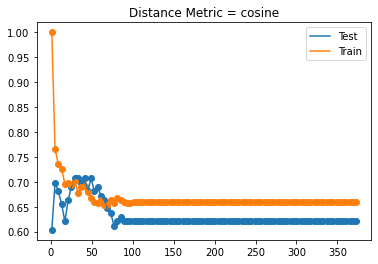

In [112]:
# Check for a large number of K values for the best K value as well as distance metrics.

k_values = np.arange(1, max(category_counts), 4)
distance_metrics = ["euclidean", "manhattan", "cosine"]

for dist in distance_metrics:
    
    train_accuracies = []
    test_accuracies = []
    print(f"Distance Metrics Used = {dist}")
    
    for k in k_values:
        
        # Training
        ypreds_train = []
        for row in X_train_np_80:
            current_prediction = predict_using_KNN(X_train_np_80, y_train_np_80, row, k, dist)
            ypreds_train.append(current_prediction)
        ypreds_train = np.array(ypreds_train).reshape(-1, 1)

        # Testing
        ypreds_test = []
        for row in X_test_np_20:
            current_prediction = predict_using_KNN(X_train_np_80, y_train_np_80, row, k, dist)
            ypreds_test.append(current_prediction)
        ypreds_test = np.array(ypreds_test).reshape(-1, 1)

        # Accuracies
        train_accuracy = calculate_accuracy(ypreds_train, y_train_np_80)
        test_accuracy = calculate_accuracy(ypreds_test, y_test_np_20)

        print(f"k = {k}, Test = {test_accuracy}, Train = {train_accuracy}")

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    
    # Plotting Train and Test Accuracies for the values of K.

    plt.scatter(k_values, test_accuracies)
    plt.plot(k_values, test_accuracies, label = "Test")
    plt.scatter(k_values, train_accuracies)
    plt.plot(k_values, train_accuracies, label = "Train")
    plt.title(f"Distance Metric = {dist}")

    plt.legend()
    plt.show()

In [ ]:
# Check for a large number of K values for the best K value.

k_values = np.arange(15,35)
train_accuracies = []
test_accuracies = []

for k in k_values:
    
    # Training
    ypreds_train = []
    for row in X_train_np_80:
        current_prediction = predict_using_KNN(X_train_np_80, y_train_np_80, row, k)
        ypreds_train.append(current_prediction)
    ypreds_train = np.array(ypreds_train).reshape(-1, 1)
    
    # Testing
    ypreds_test = []
    for row in X_test_np_20:
        current_prediction = predict_using_KNN(X_train_np_80, y_train_np_80, row, k)
        ypreds_test.append(current_prediction)
    ypreds_test = np.array(ypreds_test).reshape(-1, 1)
    
    # Accuracies
    train_accuracy = calculate_accuracy(ypreds_train, y_train_np_80)
    test_accuracy = calculate_accuracy(ypreds_test, y_test_np_20)
    
    print(f"k = {k}, Test = {test_accuracy}, Train = {train_accuracy}")
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
# Plotting Train and Test Accuracies for the values of K.

plt.scatter(k_values, test_accuracies)
plt.plot(k_values, test_accuracies, label = "Test")
plt.scatter(k_values, train_accuracies)
plt.plot(k_values, train_accuracies, label = "Train")

plt.legend()
plt.show()

## Testing

In [27]:
# Choosing k = 17 or k = 29 since that yields a good test-train accuracy pair.

In [68]:
X_test_path = r'Diabetes_Xtest.csv'

In [69]:
X_test = pd.read_csv(X_test_path)

In [70]:
X_test.shape

(192, 8)

In [71]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,0,28.7,0.092,25
3,13,76,60,0,0,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22


In [72]:
X_test_np = X_test.to_numpy()

In [73]:
X_test_np

array([[0.00e+00, 1.80e+02, 9.00e+01, ..., 3.65e+01, 3.14e-01, 3.50e+01],
       [2.00e+00, 9.30e+01, 6.40e+01, ..., 3.80e+01, 6.74e-01, 2.30e+01],
       [2.00e+00, 1.14e+02, 6.80e+01, ..., 2.87e+01, 9.20e-02, 2.50e+01],
       ...,
       [0.00e+00, 1.62e+02, 7.60e+01, ..., 4.96e+01, 3.64e-01, 2.60e+01],
       [1.20e+01, 8.40e+01, 7.20e+01, ..., 2.97e+01, 2.97e-01, 4.60e+01],
       [0.00e+00, 9.40e+01, 0.00e+00, ..., 0.00e+00, 2.56e-01, 2.50e+01]])

In [79]:
# Predictions

ypreds = []
for row in X_test_np:
    current_prediction = predict_using_KNN(X_train_np, y_train_np, row, k = 25, dist = "manhattan")
    ypreds.append(current_prediction)
ypreds = np.array(ypreds).reshape(-1, 1)

In [80]:
solution = pd.DataFrame(ypreds, columns = ['Outcome'])

In [81]:
solution

,Outcome
0,0
1,0
2,0
3,0
4,0
...,...
187,0
188,0
189,1
190,0


In [82]:
solution
solution.to_csv('sample_submission_k13_manhattan.csv', index=False)

In [83]:
np.unique(solution['Outcome'], return_counts=True)

(array([0, 1]), array([135,  57]))

## Debugging

In [317]:
# Sample Submission

sample_submission_path = r'sample_submission_solution.csv'
sample_submission = pd.read_csv(sample_submission_path)

In [318]:
sample_submission.head()

,Outcome
0,1
1,1
2,1
3,1
4,1


In [319]:
solution.head()

,Outcome
0,1
1,0
2,0
3,0
4,0


In [320]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Outcome  192 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [321]:
solution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Outcome  192 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [85]:
# Learning to Calculate Cosine Distance

X_train_np_cosine = X_train_np.copy()
x_test = X_test_np.copy()[0]

In [88]:
print(X_train_np_cosine.shape)
print(x_test.shape)

(576, 8)
(8,)


In [104]:
from scipy import spatial

cosine_distances = np.zeros((X_train_np_cosine.shape[0], 1))
i = 0
for row in X_train_np_cosine:
    print(row)
    cosine_distances[i] = 1 - spatial.distance.cosine(row, x_test)
    i += 1

[  7.    168.     88.     42.    321.     38.2     0.787  40.   ]
[  8.    110.     76.      0.      0.     27.8     0.237  58.   ]
[  7.    147.     76.      0.      0.     39.4     0.257  43.   ]
[  2.    100.     66.     20.     90.     32.9     0.867  28.   ]
[4.00e+00 1.29e+02 8.60e+01 2.00e+01 2.70e+02 3.51e+01 2.31e-01 2.30e+01]
[  7.    100.      0.      0.      0.     30.      0.484  32.   ]
[  4.    110.     66.      0.      0.     31.9     0.471  29.   ]
[  1.    111.     86.     19.      0.     30.1     0.143  23.   ]
[  3.    169.     74.     19.    125.     29.9     0.268  31.   ]
[ 1.    71.    62.     0.     0.    21.8    0.416 26.   ]
[  2.    101.     58.     35.     90.     21.8     0.155  22.   ]
[ 10.    115.      0.      0.      0.      0.      0.261  30.   ]
[  3.     96.     56.     34.    115.     24.7     0.944  39.   ]
[  6.    124.     72.      0.      0.     27.6     0.368  29.   ]
[  0.   145.     0.     0.     0.    44.2    0.63  31.  ]
[  6.    114.     

In [106]:
cosine_distances.shape

(576, 1)